# Full Sky: satellite tracking data

In [1]:
import requests
import pandas as pd
import configparser

In [2]:
uriBase = 'https://www.space-track.org'
requestLogin = '/ajaxauth/login'

requestCmdAction = "/basicspacedata/query" 
requestFindStarlinks = "/class/tle_latest/NORAD_CAT_ID/>40000/ORDINAL/1/OBJECT_NAME/STARLINK~~/format/json/orderby/NORAD_CAT_ID%20asc"

nb_objects = -1

if nb_objects == -1:
    requestAll = '/class/gp/orderby/OBJECT_ID%20asc/emptyresult/show'
else:
    requestAll = f"/class/gp/orderby/OBJECT_ID%20asc/limit/{nb_objects}/emptyresult/show"

print(requestAll)

/class/gp/orderby/OBJECT_ID%20asc/emptyresult/show


In [3]:
# Use configparser package to pull in the ini file (pip install configparser)
config = configparser.ConfigParser()
config.read("./SLTrack.ini")
configUsr = config.get("configuration","username")
configPwd = config.get("configuration","password")
siteCred = {'identity': configUsr, 'password': configPwd}

In [4]:
with requests.Session() as session:
    # Send login request
    resp = session.post(uriBase + requestLogin, data = siteCred)
    print(resp)

    resp = session.get(uriBase + requestCmdAction + requestAll)
    print(resp)

    session.close()

<Response [200]>
<Response [200]>


In [5]:
response_json = resp.json()

In [6]:
from pprint import pprint

for k in response_json[0].keys():
    print(k)

CCSDS_OMM_VERS
COMMENT
CREATION_DATE
ORIGINATOR
OBJECT_NAME
OBJECT_ID
CENTER_NAME
REF_FRAME
TIME_SYSTEM
MEAN_ELEMENT_THEORY
EPOCH
MEAN_MOTION
ECCENTRICITY
INCLINATION
RA_OF_ASC_NODE
ARG_OF_PERICENTER
MEAN_ANOMALY
EPHEMERIS_TYPE
CLASSIFICATION_TYPE
NORAD_CAT_ID
ELEMENT_SET_NO
REV_AT_EPOCH
BSTAR
MEAN_MOTION_DOT
MEAN_MOTION_DDOT
SEMIMAJOR_AXIS
PERIOD
APOAPSIS
PERIAPSIS
OBJECT_TYPE
RCS_SIZE
COUNTRY_CODE
LAUNCH_DATE
SITE
DECAY_DATE
FILE
GP_ID
TLE_LINE0
TLE_LINE1
TLE_LINE2


In [7]:
meta_columns =  ['CCSDS_OMM_VERS', 'COMMENT', 'FILE', 'GP_ID']
no_info_columns = ['TIME_SYSTEM', 'ELEMENT_SET_NO', 'REF_FRAME', 'CENTER_NAME', 'ORIGINATOR', 'MEAN_ELEMENT_THEORY', 'CLASSIFICATION_TYPE']
tle_columns = ['TLE_LINE0', 'TLE_LINE1', 'TLE_LINE2']

drop_cols = meta_columns + no_info_columns + tle_columns

# Save all objects in a DataFrame + reorder columns
objects_df = pd.DataFrame(response_json).drop(columns=drop_cols)[['NORAD_CAT_ID', 'OBJECT_ID', 'OBJECT_NAME', 'OBJECT_TYPE', 'EPOCH', 'MEAN_MOTION',
       'ECCENTRICITY', 'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER',
       'MEAN_ANOMALY', 'EPHEMERIS_TYPE',
       'REV_AT_EPOCH', 'BSTAR', 'MEAN_MOTION_DOT', 'MEAN_MOTION_DDOT',
       'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS',
       'RCS_SIZE', 'COUNTRY_CODE', 'LAUNCH_DATE', 'SITE', 'DECAY_DATE', 'CREATION_DATE']]

# Keep original TLE in a different DataFrame
tle_df = pd.DataFrame(response_json)[tle_columns]

objects_df.columns.size

26

In [8]:
objects_df = objects_df.astype({
    'NORAD_CAT_ID':'int',
    'MEAN_MOTION':'float',
    'ECCENTRICITY':'float',
    'INCLINATION':'float',
    'RA_OF_ASC_NODE':'float',
    'ARG_OF_PERICENTER':'float',
    'MEAN_ANOMALY':'float',
    'EPHEMERIS_TYPE': 'int8',
    'REV_AT_EPOCH': 'int',
    'BSTAR':'float',
    'MEAN_MOTION_DOT':'float',
    'MEAN_MOTION_DDOT':'float',
    'SEMIMAJOR_AXIS':'float',
    'PERIOD': 'float',
    'APOAPSIS': 'float',
    'PERIAPSIS': 'float'
    })

# Convert datetime columns
objects_df['EPOCH'] = pd.to_datetime(objects_df['EPOCH'])
objects_df['DECAY_DATE'] = pd.to_datetime(objects_df['DECAY_DATE'], format='%Y-%M-%d')
objects_df['LAUNCH_DATE'] = pd.to_datetime(objects_df['LAUNCH_DATE'], format='%Y-%M-%d')
objects_df['CREATION_DATE'] = pd.to_datetime(objects_df['CREATION_DATE'])

objects_df.dtypes

NORAD_CAT_ID                  int32
OBJECT_ID                    object
OBJECT_NAME                  object
OBJECT_TYPE                  object
EPOCH                datetime64[ns]
MEAN_MOTION                 float64
ECCENTRICITY                float64
INCLINATION                 float64
RA_OF_ASC_NODE              float64
ARG_OF_PERICENTER           float64
MEAN_ANOMALY                float64
EPHEMERIS_TYPE                 int8
REV_AT_EPOCH                  int32
BSTAR                       float64
MEAN_MOTION_DOT             float64
MEAN_MOTION_DDOT            float64
SEMIMAJOR_AXIS              float64
PERIOD                      float64
APOAPSIS                    float64
PERIAPSIS                   float64
RCS_SIZE                     object
COUNTRY_CODE                 object
LAUNCH_DATE          datetime64[ns]
SITE                         object
DECAY_DATE           datetime64[ns]
CREATION_DATE        datetime64[ns]
dtype: object

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

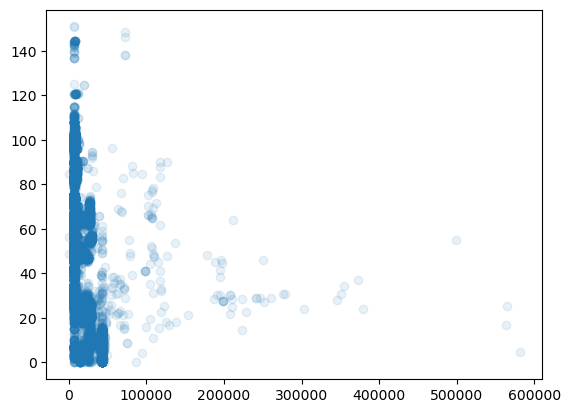

In [10]:
fig, ax = plt.subplots()

import numpy as np

ax.scatter(objects_df['SEMIMAJOR_AXIS'], objects_df['INCLINATION'], alpha=.1)
plt.show()

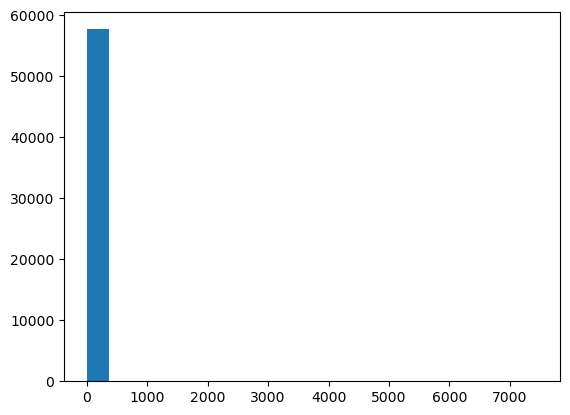

In [11]:
fig, ax = plt.subplots()
ax.hist(objects_df['BSTAR'], bins=20)
plt.show()

In [12]:
objects_df.columns

Index(['NORAD_CAT_ID', 'OBJECT_ID', 'OBJECT_NAME', 'OBJECT_TYPE', 'EPOCH',
       'MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'RA_OF_ASC_NODE',
       'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'EPHEMERIS_TYPE', 'REV_AT_EPOCH',
       'BSTAR', 'MEAN_MOTION_DOT', 'MEAN_MOTION_DDOT', 'SEMIMAJOR_AXIS',
       'PERIOD', 'APOAPSIS', 'PERIAPSIS', 'RCS_SIZE', 'COUNTRY_CODE',
       'LAUNCH_DATE', 'SITE', 'DECAY_DATE', 'CREATION_DATE'],
      dtype='object')

In [13]:
deorbit_df = objects_df.loc[(~objects_df['DECAY_DATE'].isna() & ~objects_df['LAUNCH_DATE'].isna())][['OBJECT_ID', 'OBJECT_NAME', 'OBJECT_TYPE', 'LAUNCH_DATE', 'DECAY_DATE', 'BSTAR']]

import datetime as dt

deorbit_df['DAYS_IN_ORBIT'] = deorbit_df['DECAY_DATE'] - deorbit_df['LAUNCH_DATE']
deorbit_df.sort_values('DAYS_IN_ORBIT')

,OBJECT_ID,OBJECT_NAME,OBJECT_TYPE,LAUNCH_DATE,DECAY_DATE,BSTAR,DAYS_IN_ORBIT
44644,2017-071D,ANTARES DEB,DEBRIS,2019-01-12 00:11:00,2017-01-14 00:11:00,0.003125,-728 days +00:00:00
42136,2011-062B,SL-4 R/B,ROCKET BODY,2011-01-30 00:10:00,2011-01-01 00:11:00,0.000740,-29 days +00:01:00
42661,2012-060B,SL-4 R/B,ROCKET BODY,2012-01-31 00:10:00,2012-01-02 00:11:00,0.000399,-29 days +00:01:00
37408,2000-077B,SL-12 R/B(1),ROCKET BODY,2000-01-30 00:11:00,2000-01-01 00:12:00,0.000078,-29 days +00:01:00
37385,2000-070B,SL-4 R/B,ROCKET BODY,2000-01-31 00:10:00,2000-01-02 00:11:00,0.000287,-29 days +00:01:00
...,...,...,...,...,...,...,...
954,1963-047T,ATLAS CENTAUR 2 DEB,DEBRIS,1963-01-27 00:11:00,2023-01-19 00:09:00,0.015034,21906 days 23:58:00
913,1963-038P,TRANSIT 5B-1 DEB,DEBRIS,1963-01-28 00:09:00,2023-01-25 00:04:00,0.087215,21911 days 23:55:00
393,1961-015MW,THOR ABLESTAR DEB,DEBRIS,1961-01-29 00:06:00,2022-01-06 00:05:00,0.003644,22256 days 23:59:00
246,1961-015FR,THOR ABLESTAR DEB,DEBRIS,1961-01-29 00:06:00,2022-01-29 00:11:00,0.005749,22280 days 00:05:00


## Launches since 1958

In [14]:
# Get all objects with a valid launch date
launched_objects = objects_df.loc[~objects_df['LAUNCH_DATE'].isna()]

# Keep only information about object type, date and country code
launched_objects = launched_objects[['OBJECT_ID', 'OBJECT_NAME', 'OBJECT_TYPE', 'LAUNCH_DATE', 'COUNTRY_CODE']]

# Add a column for the launch year, the launch number and the object identifier
launched_objects['YEAR'] = [x[:4] for x in launched_objects['OBJECT_ID']]
launched_objects['LAUNCH'] = [int(x[5:8]) for x in launched_objects['OBJECT_ID']]
launched_objects['OBJECT'] = [x[8:] for x in launched_objects['OBJECT_ID']]


In [15]:
launched_objects_count = (pd.DataFrame(launched_objects
                                       .groupby(['YEAR', 'OBJECT_TYPE'], as_index=False)
                                       .count()[['YEAR', 'OBJECT_TYPE', 'OBJECT']])
                                       .pivot_table(values='OBJECT', index='YEAR', columns='OBJECT_TYPE')
                                       .fillna(0)
                                       .astype({'DEBRIS': 'int', 'PAYLOAD': 'int', 'ROCKET BODY': 'int', 'TBA': 'int', 'UNKNOWN': 'int'})
                        )

launched_objects_count

OBJECT_TYPE,DEBRIS,PAYLOAD,ROCKET BODY,TBA,UNKNOWN
YEAR,,,,,
1958,1,1,1,0,0
1959,3,3,2,0,0
1960,11,6,6,0,0
1961,293,8,4,0,0
1962,20,11,10,0,0
...,...,...,...,...,...
2020,126,1210,62,0,5
2021,111,1718,87,2,76
2022,991,2243,107,0,145


<Axes: xlabel='YEAR'>

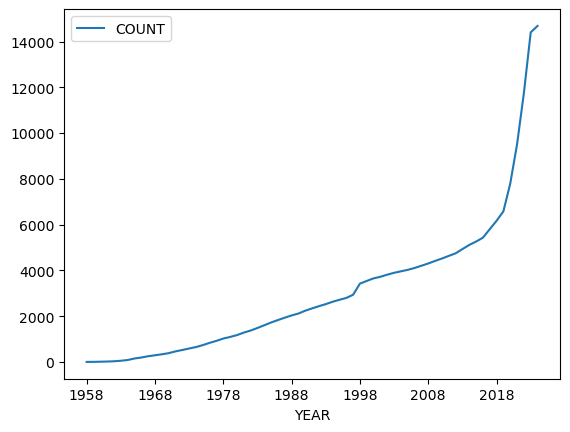

In [16]:
from itertools import accumulate

satellites_launched = pd.DataFrame(launched_objects_count['PAYLOAD']).reset_index()
satellites_launched['COUNT'] = pd.Series(accumulate(satellites_launched['PAYLOAD'].to_list()))

satellites_launched.plot(x='YEAR', y='COUNT')

In [17]:
launched_objects_count.sort_values('PAYLOAD', ascending=False)

OBJECT_TYPE,DEBRIS,PAYLOAD,ROCKET BODY,TBA,UNKNOWN
YEAR,,,,,
2023,130,2650,105,0,231
2022,991,2243,107,0,145
2021,111,1718,87,2,76
2020,126,1210,62,0,5
1998,221,487,84,11,11
...,...,...,...,...,...
1962,20,11,10,0,0
1961,293,8,4,0,0
1960,11,6,6,0,0


### Satellites launched from the ISS
Because of the way the tracked objects are named, all satellites deployed from the ISS inherit the launch code (Object ID) from the ISS (ZARYA) module, i.e. 1998-067RG. Although the satellites were launched on board a traditional launch vehicle, they were never placed into orbit on their own before separating from the ISS module. They are therefore treated almost as if they were debris, or at least mission-related jettisoned objects, deployed from the space station.

This results in a spike of satellites deployed in 1998 (the year the Zarya module was launched) although most of these were actually launched and deployed in 2020.

The CubeSat QARMAN is shown here as an example: https://orbit.ing-now.com/satellite/45263/1998-067rg/qarman/

In [18]:
check_1998 = objects_df.loc[(objects_df['LAUNCH_DATE'] < dt.datetime(1999,1,1)) & (objects_df['LAUNCH_DATE'] >= dt.datetime(1998,1,1)) & (objects_df['OBJECT_TYPE'] == 'PAYLOAD')]
check_1998 = check_1998[['OBJECT_ID', 'OBJECT_NAME', 'LAUNCH_DATE']]

# Add a column for the launch year, the launch number and the object identifier
check_1998['YEAR'] = [x[:4] for x in check_1998['OBJECT_ID']]
check_1998['LAUNCH'] = [int(x[5:8]) for x in check_1998['OBJECT_ID']]
check_1998['OBJECT'] = [x[8:] for x in check_1998['OBJECT_ID']]

for satellite in check_1998.loc[check_1998['LAUNCH']==67]['OBJECT_NAME']:
    print(satellite)

ISS (ZARYA)
RADIOSCAF-B (KEDR)
SFERA
RAIKO
FITSAT 1
TECH-ED-SAT
F-1
WE-WISH
ARDUSAT 1
PICODRAGON
ARDUSAT X
TECHEDSAT 3P
FLOCK 1-3
FLOCK 1-1
FLOCK 1-2
FLOCK 1-4
FLOCK 1-5
FLOCK 1-6
FLOCK 1-7
FLOCK 1-8
FLOCK 1-9
FLOCK 1-10
FLOCK 1-11
FLOCK 1-12
FLOCK 1-13
FLOCK 1-14
FLOCK 1-15
FLOCK 1-16
FLOCK 1-17
FLOCK 1-18
FLOCK 1-21
FLOCK 1-22
FLOCK 1-19
FLOCK 1-20
FLOCK 1-23
FLOCK 1-24
FLOCK 1-25
FLOCK 1-26
FLOCK 1-27
FLOCK 1-28
SKYCUBE
UAPSAT 1
LITUANICASAT 1
LITSAT 1
ARDUSAT 2
CHASQUI-1
FLOCK 1B 24
FLOCK 1B 23
FLOCK 1B 26
FLOCK 1B 25
FLOCK 1B 15
FLOCK 1B 16
FLOCK 1B 1
FLOCK 1B 2
FLOCK 1B 8
FLOCK 1B 7
FLOCK 1B 18
FLOCK 1B 17
SPINSAT
AESP 14
FLOCK 1B 27
FLOCK 1B 28
FLOCK 1B 21
FLOCK 1B 22
FLOCK 1B 10
FLOCK 1B 9
FLOCK 1D 1
FLOCK 1D 2
FLOCK 1B 5
FLOCK 1B 6
TECHEDSAT 4
GEARRS-1
MICROMAS
LAMBDASAT
FLOCK 1B 11
FLOCK 1B 12
FLOCK 1E 2
FLOCK 1E 1
FLOCK 1E 4
FLOCK 1E 3
FLOCK 1E 7
FLOCK 1E 8
FLOCK 1E 5
FLOCK 1E 6
FLOCK 1E 9
FLOCK 1E 10
FLOCK 1E 11
FLOCK 1E 12
FLOCK 1E 13
FLOCK 1E 14
ARKYD-3R
CENTENNIAL 1
SERP

## Objects that are still in orbit

In [42]:
# Select all objects without a decay date
object_in_orbits = objects_df.loc[objects_df['DECAY_DATE'].isna(),:].reset_index(drop=True)

In [47]:
count_per_types = object_in_orbits.groupby('OBJECT_TYPE', as_index=True).count()[['OBJECT_ID']]
count_per_types

,OBJECT_ID
OBJECT_TYPE,
DEBRIS,13156
PAYLOAD,11828
ROCKET BODY,2181
TBA,196
UNKNOWN,1290


In [44]:
object_in_orbits.loc[object_in_orbits['OBJECT_TYPE']=='UNKNOWN']['OBJECT_NAME'].unique()

array(['TBA - TO BE ASSIGNED', 'OBJECT AX', 'OBJECT A', 'OBJECT G',
       'OBJECT AA', 'OBJECT C', 'OBJECT F', 'OBJECT H', 'OBJECT J',
       'OBJECT K', 'OBJECT M', 'OBJECT U', 'OBJECT Z', 'OBJECT Y',
       'OBJECT B', 'OBJECT D', 'OBJECT E', 'OBJECT AH', 'OBJECT AV',
       'OBJECT AZ', 'OBJECT BA', 'OBJECT BE', 'OBJECT BS', 'OBJECT P',
       'OBJECT Q', 'OBJECT T', 'OBJECT X', 'OBJECT L', 'OBJECT N',
       'OBJECT R', 'OBJECT AE', 'OBJECT AJ', 'OBJECT BC', 'OBJECT BG',
       'OBJECT DQ', 'OBJECT AC', 'OBJECT AD', 'OBJECT AG', 'OBJECT V',
       'OBJECT W', 'OBJECT CN', 'OBJECT CW', 'OBJECT DD', 'OBJECT S',
       'OBJECT AF', 'OBJECT CA', 'OBJECT CK', 'OBJECT-DD', 'OBJECT AB',
       'OBJECT BQ', 'OBJECT BR', 'OBJECT BW', 'OBJECT AK', 'OBJECT AL',
       'OBJECT AM', 'OBJECT AN', 'OBJECT AP', 'OBJECT AQ', 'OBJECT AR',
       'OBJECT AS', 'OBJECT AU', 'OBJECT AW', 'OBJECT AY', 'OBJECT BB',
       'OBJECT BP', 'OBJECT BY', 'OBJECT CC', 'OBJECT CG', 'OBJECT CQ',
       'OBJECT CR'

In [45]:
object_in_orbits.loc[object_in_orbits['OBJECT_TYPE']=='TBA']['OBJECT_NAME'].unique()

array(['TBA - TO BE ASSIGNED', 'OBJECT D'], dtype=object)

In [48]:
# Create a new raw called TBD to add the counts of TBA and UNKNOWN together
count_per_types.loc['TBD','OBJECT_ID'] = count_per_types.loc['TBA','OBJECT_ID'] + count_per_types.loc['UNKNOWN','OBJECT_ID']

# Drop the TBA and UNKNOWN rows that are not used anymore
count_per_types = count_per_types.drop('TBA', axis=0)
count_per_types = count_per_types.drop('UNKNOWN', axis=0)

In [52]:
count_per_types

,OBJECT_ID
OBJECT_TYPE,
DEBRIS,13156.0
PAYLOAD,11828.0
ROCKET BODY,2181.0
TBD,1486.0


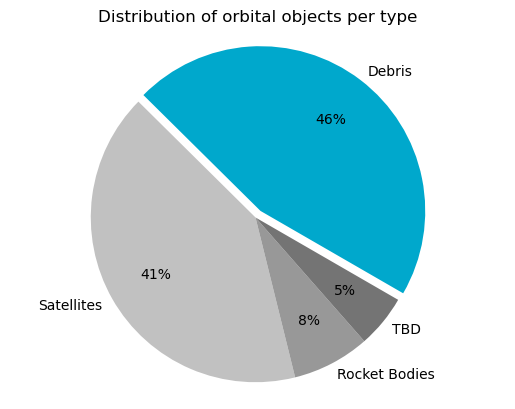

In [103]:
fig, ax = plt.subplots()

sns.despine()

c1 = '#00a8cc'
c2 = '#c1c1c1'
c3 = '#989898'
c4 = '#747474'

labels = ['Debris', 'Satellites', 'Rocket Bodies', 'TBD']

ax.pie(
    x = count_per_types['OBJECT_ID'],
    autopct='%.f%%',
    labels=labels,
    colors=[c1, c2, c3, c4],
    explode=[.05,0,0,0],
    pctdistance=.7,
    labeldistance=1.07,
    startangle=-30
    )

ax.set_title('Distribution of orbital objects per type')

plt.axis("equal")
plt.show()

### Orbital debris

In [105]:
debris_in_orbits = object_in_orbits.loc[object_in_orbits['OBJECT_TYPE']=='DEBRIS',:]

In [114]:
time_in_orbit = pd.DataFrame()

time_in_orbit['Year'] = debris_in_orbits['LAUNCH_DATE'].dt.year
time_in_orbit['Month'] = debris_in_orbits['LAUNCH_DATE'].dt.month

In [117]:
time_in_orbit = time_in_orbit.dropna(how='any')
time_in_orbit = time_in_orbit.astype({'Year': 'int', 'Month': 'int'})
time_in_orbit

,Year,Month
2,1958,1
8,1960,1
13,1960,1
14,1960,1
15,1960,1
...,...,...
26951,2023,1
27006,2023,1
27368,2023,1
27444,2023,1


In [119]:
time_in_orbit = time_in_orbit.drop(columns=['Month'])
time_in_orbit

,Year
2,1958
8,1960
13,1960
14,1960
15,1960
...,...
26951,2023
27006,2023
27368,2023
27444,2023


In [131]:
debris_per_year = time_in_orbit.groupby('Year').agg({'Year':'count'})
debris_per_year['Years'] = 2024 - debris_per_year.index
debris_per_year = debris_per_year.reset_index(drop=True)

In [135]:
debris_per_year = debris_per_year.rename({'Year': 'Count'})

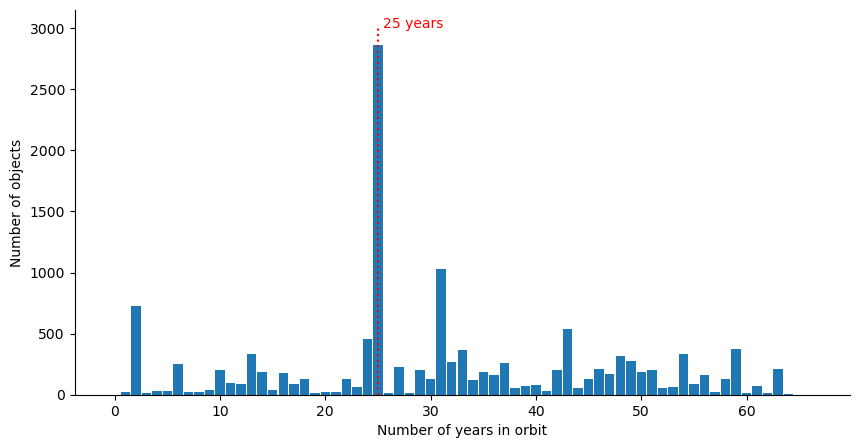

In [159]:
debris_per_year = debris_per_year.sort_values('Years', ascending=True)
x = debris_per_year['Years']
y = debris_per_year['Year']

fig, ax = plt.subplots(figsize=(10,5))
sns.despine()

ax.bar(x, y, width=.9)
ax.vlines(25, 0, 3000, 'r', ls=':')
ax.annotate('25 years', [25,3000], [25.5, 3000], c='red')

ax.set_xlabel('Number of years in orbit')
ax.set_ylabel('Number of objects')

plt.show()

## Objects in the field of view

In [162]:
# In order to accurately propagate the objects positions,
# only the object with valid launch dates and epoch are kept
object_in_orbits = object_in_orbits.loc[~object_in_orbits['LAUNCH_DATE'].isna()]

In [167]:
# Drop unnecessary columns
object_in_orbits = object_in_orbits.drop(columns=['EPHEMERIS_TYPE', 'DECAY_DATE', 'CREATION_DATE'])

In [170]:
object_in_orbits['SEMIMAJOR_AXIS'].describe()

count     27643.000000
mean      11550.890359
std       13709.716744
min        6526.625000
25%        6937.267000
50%        7208.759000
75%        7809.706000
max      581452.967000
Name: SEMIMAJOR_AXIS, dtype: float64

In [171]:
object_in_orbits['ECCENTRICITY'].describe()

count    27643.000000
mean         0.069951
std          0.183712
min          0.000002
25%          0.000288
50%          0.002799
75%          0.013399
max          0.988498
Name: ECCENTRICITY, dtype: float64

In [164]:
object_in_orbits.columns

Index(['NORAD_CAT_ID', 'OBJECT_ID', 'OBJECT_NAME', 'OBJECT_TYPE', 'EPOCH',
       'MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'RA_OF_ASC_NODE',
       'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'EPHEMERIS_TYPE', 'REV_AT_EPOCH',
       'BSTAR', 'MEAN_MOTION_DOT', 'MEAN_MOTION_DDOT', 'SEMIMAJOR_AXIS',
       'PERIOD', 'APOAPSIS', 'PERIAPSIS', 'RCS_SIZE', 'COUNTRY_CODE',
       'LAUNCH_DATE', 'SITE', 'DECAY_DATE', 'CREATION_DATE'],
      dtype='object')

#### Find the ISS

In [186]:
for obj in object_in_orbits['OBJECT_NAME'].unique():
    if 'ISS' in obj:
        print(obj)

UME 1 (ISS 1)
UME 2 (ISS-B)
ISS (ZARYA)
ISS DEB (EP BATTERY)
ISS DEB (SPX-28 IPA FSE)
ISS DEB
ISS (ZVEZDA)
SWISSCUBE
AISSAT 1
MARS ORBITER MISSION
AISSAT 2
ISS (NAUKA)
OUTPOST MISSION 1


In [187]:
object_in_orbits.loc[object_in_orbits['OBJECT_NAME'].isin(['ISS (ZARYA)', 'ISS (ZVEZDA)', 'ISS (NAUKA)'])]

,NORAD_CAT_ID,OBJECT_ID,OBJECT_NAME,OBJECT_TYPE,EPOCH,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,...,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE
10610,25544,1998-067A,ISS (ZARYA),PAYLOAD,2024-03-05 15:22:15.154752,15.496481,0.000586,51.6409,108.5681,329.5475,...,0.000164,0.0,6795.892,92.924,421.737,413.776,LARGE,ISS,1998-01-20 00:11:00,TTMTR
13737,26400,2000-037A,ISS (ZVEZDA),PAYLOAD,2000-07-26 20:13:21.523008,15.698189,0.001279,51.5790,297.6001,171.3037,...,0.000777,0.0,6737.556,91.730,368.039,350.803,LARGE,ISS,2000-01-12 00:07:00,TTMTR
21076,49044,2021-066A,ISS (NAUKA),PAYLOAD,2024-03-05 13:12:17.285184,15.496501,0.000617,51.6386,109.0176,330.6993,...,0.000189,0.0,6795.886,92.924,421.947,413.555,LARGE,CIS,2021-01-21 00:07:00,TTMTR


In [191]:
# Use Zarya as the reference object for the ISS
iss_df = object_in_orbits.loc[object_in_orbits['OBJECT_NAME'] == 'ISS (ZARYA)']

In [193]:
iss_df.T

,10610
NORAD_CAT_ID,25544
OBJECT_ID,1998-067A
OBJECT_NAME,ISS (ZARYA)
OBJECT_TYPE,PAYLOAD
EPOCH,2024-03-05 15:22:15.154752
MEAN_MOTION,15.496481
ECCENTRICITY,0.000586
INCLINATION,51.6409
RA_OF_ASC_NODE,108.5681
ARG_OF_PERICENTER,329.5475


### Human vision

In [179]:
# Position of the observer
# Melbourne
lat = -37.8136
lon = 144.9631

# Line of sight of the observer
los_el = 60 # 60 deg above the horizon 
los_az = 0 # North (measured in degrees clockwise from the north)

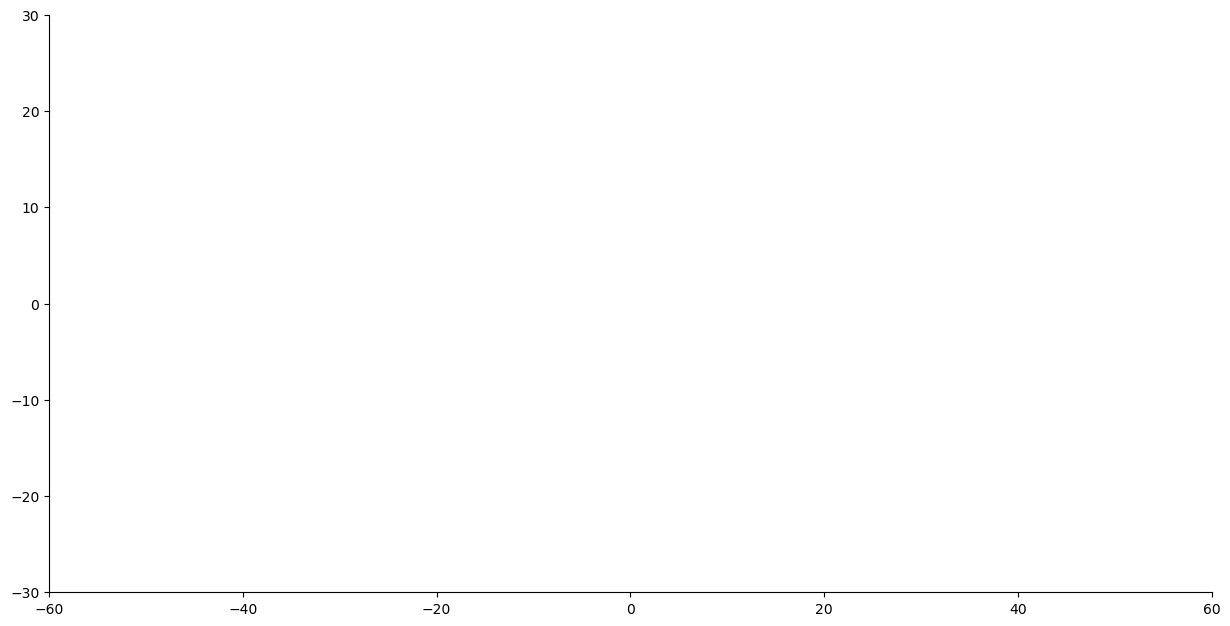

In [178]:
FOV_v = 60 # deg
FOV_h = 120 # deg

scale_factor = 8

fig, ax = plt.subplots(figsize=(FOV_h/scale_factor, FOV_v/scale_factor))
sns.despine()

ax.set_xlim(-FOV_h/2, FOV_h/2)
ax.set_ylim(-FOV_v/2, FOV_v/2)

plt.show()